# Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/content/Tartazine_Removal_Final.xlsx')
df.head()

,conc(ppm),ad_dose(g/L),ph_value,temperature(⁰C),time,absorbance,conc2(=absorbance/0.029),removal(=30-conc2),%removal(=removal*(100/30))
0,10,1.0,6,30,15,0.0229,0.789655,29.210345,97.367816
1,10,1.0,6,30,30,0.0153,0.527586,29.472414,98.241379
2,10,1.0,6,30,45,0.0152,0.524138,29.475862,98.252874
3,10,1.0,6,30,60,0.0140,0.482759,29.517241,98.390805
4,10,1.0,6,30,120,0.0110,0.379310,29.620690,98.735632


In [3]:
# removing similar columns (which can simply calculated mathematically)

df = df.drop(columns=['removal(=30-conc2)', '%removal(=removal*(100/30))', 'absorbance'])
print(df.shape)
df.head()

(90, 6)


,conc(ppm),ad_dose(g/L),ph_value,temperature(⁰C),time,conc2(=absorbance/0.029)
0,10,1.0,6,30,15,0.789655
1,10,1.0,6,30,30,0.527586
2,10,1.0,6,30,45,0.524138
3,10,1.0,6,30,60,0.482759
4,10,1.0,6,30,120,0.379310


In [4]:
# feature columns
x_df = df.drop(columns='conc2(=absorbance/0.029)')

# target column
y_df = df['conc2(=absorbance/0.029)']

In [5]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

x_df_scaled = mms.fit_transform(x_df)

In [6]:
# split the data into train & test set

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x_df_scaled, y_df, test_size=0.1, random_state=10)

# Machine Learning

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

In [8]:
lin = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor(random_state=0)
bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), random_state=0)
forest = RandomForestRegressor(random_state=0)
grad = GradientBoostingRegressor(random_state=0)
ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0),random_state=0)

In [9]:
MAE = []
R2 = []
for i in (lin, knn, svr, tree, bag, forest, grad, ada):
  i.fit(x_train, y_train)
  y_pred = i.predict(x_test)
  
  R2.append(r2(y_test, y_pred))
  MAE.append(mae(y_test, y_pred))

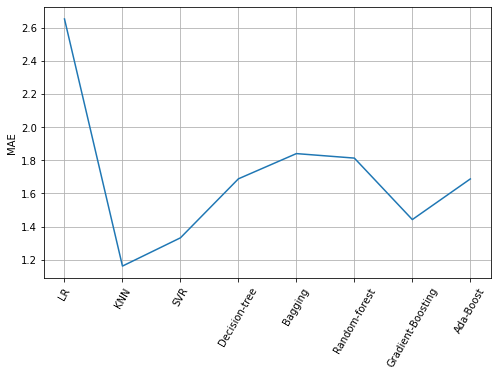

In [10]:
# cheking mean_absolute_error calculated by some ML Algorithms

pd.Series(MAE, index=('LR', 'KNN', 'SVR', 'Decision-tree', 'Bagging', 'Random-forest', 'Gradient-Boosting', 'Ada-Boost')).plot(grid=True, figsize=(8,5))
plt.xticks(rotation = 60)
plt.ylabel('MAE')
plt.show()

In [11]:
MAE

[2.651351711013849,
 1.1625287356321838,
 1.3327024387777022,
 1.6882503192848022,
 1.8402041142127348,
 1.81312207474305,
 1.4427008490651811,
 1.687547892720306]

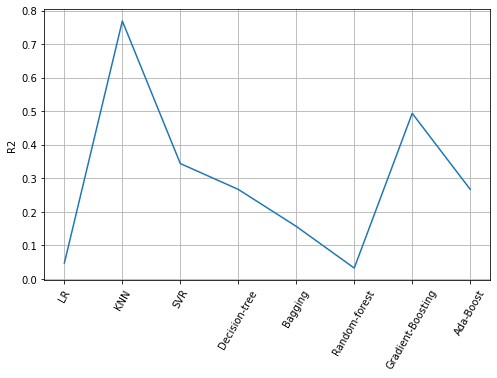

In [12]:
# cheking r2_score calculated by some ML Algorithms

pd.Series(R2, index=('LR', 'KNN', 'SVR', 'Decision-tree', 'Bagging', 'Random-forest', 'Gradient-Boosting', 'Ada-Boost')).plot(grid=True, figsize=(8,5))
plt.xticks(rotation = 60)
plt.ylabel('R2')
plt.show()

In [13]:
R2

[0.0474262652989923,
 0.7688413527068171,
 0.3439996971568996,
 0.2670090418104609,
 0.15682924869879045,
 0.032591433615752785,
 0.49371061971236363,
 0.26724227852207705]

In [14]:
max(R2)

0.7688413527068171

Here, I can easily see, KNN gives lowest MAE and highest R2 score.

## KNN model's parameter tuning

In [15]:
e = []
for i in np.arange(1,11):   
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)

  e.append(r2(y_test, y_pred))

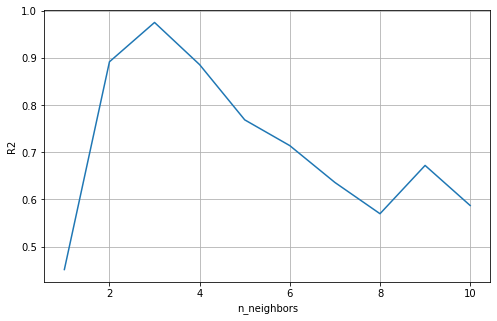

In [16]:
pd.Series(e, index=np.arange(1,11)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_neighbors')
plt.ylabel('R2')
plt.show()

In [17]:
# knn gives highest R2 score at n_neighbors=3
knn = KNeighborsRegressor(n_neighbors = 3)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('R2 :', r2(y_test, y_pred))
print('MAE :', mae(y_test, y_pred))

R2 : 0.9753892492740357
MAE : 0.4563218390804599


In [18]:
# original_x_test
# conc(ppm),	ad_dose(g/L),	ph_value,	temperature(⁰C),	time 

original_x_test = mms.inverse_transform(x_test)
original_x_test

array([[ 30. ,   1. ,   6. ,  30. ,  30. ],
       [ 30. ,   0.5,   6. ,  30. ,  30. ],
       [ 10. ,   1. ,   6. ,  30. ,  60. ],
       [ 30. ,   1.5,   6. ,  30. ,  15. ],
       [ 60. ,   1. ,   6. ,  30. , 120. ],
       [ 30. ,   1. ,   6. ,  30. , 120. ],
       [ 30. ,   1.5,   6. ,  30. ,  45. ],
       [ 30. ,   1. ,  10. ,  30. ,  60. ],
       [ 30. ,   1.5,   6. ,  30. ,  60. ]])

In [19]:
# calculate actual '%removal'
testt = []
for i in y_test:
  testt.append((30-i)*(100/30))
testt

[91.11494252873564,
 57.6551724137931,
 98.39080459770115,
 96.88505747126437,
 88.95402298850576,
 98.0,
 97.816091954023,
 98.48275862068965,
 98.65517241379311]

In [20]:
# calculate ML model predicted '%removal'
predd = []
for i in y_pred:
  predd.append((30-i)*(100/30))
predd

[94.36781609195403,
 55.39463601532567,
 98.37164750957855,
 93.97318007662835,
 86.00766283524904,
 98.09578544061303,
 97.45977011494253,
 97.62452107279694,
 97.66666666666667]

In [21]:
# compare actual and predicted '%removal'

print('percent removal error :', mae(testt, predd))

percent removal error : 1.5210727969348667


In [22]:
# save best ML model for further prediction
import pickle

pickle.dump(knn,open('Nilavo_ML.pkl','wb'))

# Deep Learning

ANN

In [23]:
pip install keras-tuner

     |████████████████████████████████| 133 kB 5.3 MB/s 


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import keras_tuner
from kerastuner.tuners import RandomSearch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import sys


In [25]:
# building model

def build_model(hp):
    model = Sequential()
    model.add(Dense(units= hp.Int('n', min_value=16, max_value=512, step=16), activation= 'relu', input_dim= x_train.shape[1]))
    for i in range(hp.Int('hidden_layers', min_value=1, max_value=3)):
        model.add(Dense(units= hp.Int('neurons'+str(i), min_value=16, max_value=256, step=16), activation= 'relu'))
    model.add(Dense(units=1, activation='linear'))
              
    model.compile(optimizer = Adam(learning_rate = hp.Choice('lr', [1e-2, 1e-3, 1e-4])), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])
    return model

In [26]:
tuner = RandomSearch(build_model, objective='val_mean_absolute_error', max_trials=10, executions_per_trial=3, directory='output', project_name='tartazine_removal')

In [27]:
# search best model
tuner.search(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Trial 10 Complete [00h 00m 06s]
val_mean_absolute_error: 1.521426518758138

Best val_mean_absolute_error So Far: 0.40839578708012897
Total elapsed time: 00h 01m 35s
INFO:tensorflow:Oracle triggered exit


In [28]:
best_model = tuner.get_best_models(num_models=1)[0]

In [29]:
# my DL model's details
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                288       
                                                                 
 dense_1 (Dense)             (None, 32)                1568      
                                                                 
 dense_2 (Dense)             (None, 192)               6336      
                                                                 
 dense_3 (Dense)             (None, 16)                3088      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11,297
Trainable params: 11,297
Non-trainable params: 0
_________________________________________________________________


In [30]:
# making prediction

y_pred = best_model.predict(x_test)

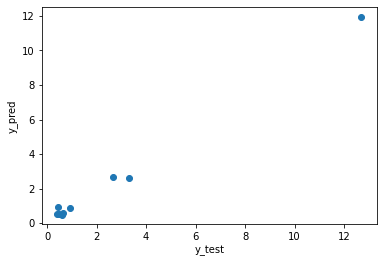

In [31]:
# plot actual conc vs predicted conc

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [32]:
# statistical results of Deep Learning model predicted conc
print('R2 :', r2(y_test, y_pred))
print('MAE :', mae(y_test, y_pred))

R2 : 0.9893832565588225
MAE : 0.2660412106249068


In [33]:
# original_x_test [ conc(ppm),	ad_dose(g/L),	ph_value,	temperature(⁰C),	time ]

original_x_test = mms.inverse_transform(x_test)
original_x_test

array([[ 30. ,   1. ,   6. ,  30. ,  30. ],
       [ 30. ,   0.5,   6. ,  30. ,  30. ],
       [ 10. ,   1. ,   6. ,  30. ,  60. ],
       [ 30. ,   1.5,   6. ,  30. ,  15. ],
       [ 60. ,   1. ,   6. ,  30. , 120. ],
       [ 30. ,   1. ,   6. ,  30. , 120. ],
       [ 30. ,   1.5,   6. ,  30. ,  45. ],
       [ 30. ,   1. ,  10. ,  30. ,  60. ],
       [ 30. ,   1.5,   6. ,  30. ,  60. ]])

In [34]:
# calculate actual '%removal'
testt = []
for i in y_test:
  testt.append((30-i)*(100/30))
testt

[91.11494252873564,
 57.6551724137931,
 98.39080459770115,
 96.88505747126437,
 88.95402298850576,
 98.0,
 97.816091954023,
 98.48275862068965,
 98.65517241379311]

In [35]:
# calculate DL model predicted '%removal'
predd = []
for i in y_pred:
  predd.append((30-i[0])*(100/30))
predd

[91.02919975916545,
 60.18394470214844,
 98.23464949925742,
 97.17094838619232,
 91.37181758880615,
 98.33879878123602,
 98.14130147298178,
 96.97088559468588,
 98.3241730928421]

In [36]:
# compare actual and predicted '%removal'
from sklearn.metrics import mean_absolute_error as mae
print('percent removal error :', mae(testt, predd))

percent removal error : 0.886804035416354


In [37]:
# save best DL model for further prediction
import pickle

pickle.dump(best_model,open('Nilavo_DL.pkl','wb'))

INFO:tensorflow:Assets written to: ram://60270a94-d89d-4069-9c79-55d0b9b6b2ac/assets


## Generate Data Using GAN 

In [103]:
data_cols = ['conc(ppm)',	'ad_dose(g/L)',	'ph_value',	'temperature(⁰C)',	'time',	'conc2(=absorbance/0.029)']

In [104]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

from tensorflow.keras.optimizers import Adam

In [105]:
class GAN():
    
    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.generator = Generator(self.batch_size).\
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator(self.batch_size).\
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim,))
        record = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(record)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))
        
    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments
        
        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))

        for epoch in range(epochs):    
            # ---------------------
            #  Train Discriminator
            # ---------------------
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images
            gen_data = self.generator.predict(noise)
    
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(batch_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)
    
            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
    
            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                #Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

                #Here is generating the data
                z = tf.random.normal((432, self.noise_dim))
                gen_data = self.generator(z)
                print('generated_data')

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return
    
    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator
    
class Generator():
    def __init__(self, batch_size):
        self.batch_size=batch_size
        
    def build_model(self, input_shape, dim, data_dim):
        input= Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim, activation='relu')(input)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=input, outputs=x)

class Discriminator():
    def __init__(self,batch_size):
        self.batch_size=batch_size
    
    def build_model(self, input_shape, dim):
        input = Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim * 4, activation='relu')(input)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=input, outputs=x)

In [106]:
noise_dim = 32
dim = 128
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model'



gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

In [107]:
!mkdir model

mkdir: cannot create directory ‘model’: File exists


In [108]:
model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(df,train_args)

Streaming output truncated to the last 5000 lines.
57 [D loss: 0.433833, acc.: 73.44%] [G loss: 0.851864]
58 [D loss: 0.428712, acc.: 79.69%] [G loss: 0.978380]
59 [D loss: 0.410219, acc.: 90.62%] [G loss: 1.065670]
60 [D loss: 0.421979, acc.: 82.81%] [G loss: 1.050456]
61 [D loss: 0.379761, acc.: 87.50%] [G loss: 1.107617]
62 [D loss: 0.444246, acc.: 84.38%] [G loss: 1.041845]
63 [D loss: 0.439537, acc.: 85.94%] [G loss: 0.998508]
64 [D loss: 0.397385, acc.: 92.19%] [G loss: 1.057029]
65 [D loss: 0.341223, acc.: 93.75%] [G loss: 1.177799]
66 [D loss: 0.322706, acc.: 93.75%] [G loss: 1.230767]
67 [D loss: 0.402096, acc.: 85.94%] [G loss: 1.059270]
68 [D loss: 0.483878, acc.: 56.25%] [G loss: 1.000602]
69 [D loss: 0.493831, acc.: 64.06%] [G loss: 0.924951]
70 [D loss: 0.446029, acc.: 65.62%] [G loss: 0.892148]
71 [D loss: 0.518050, acc.: 50.00%] [G loss: 0.771796]
72 [D loss: 0.552323, acc.: 50.00%] [G loss: 0.826037]
73 [D loss: 0.537353, acc.: 51.56%] [G loss: 0.905307]
74 [D loss: 0.

In [109]:
!mkdir model/gan
!mkdir model/gan/saved

mkdir: cannot create directory ‘model/gan’: File exists
mkdir: cannot create directory ‘model/gan/saved’: File exists


In [110]:
synthesizer.generator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(32, 32)]                0         
                                                                 
 dense_4 (Dense)             (32, 128)                 4224      
                                                                 
 dense_5 (Dense)             (32, 256)                 33024     
                                                                 
 dense_6 (Dense)             (32, 512)                 131584    
                                                                 
 dense_7 (Dense)             (32, 6)                   3078      
                                                                 
Total params: 171,910
Trainable params: 171,910
Non-trainable params: 0
_________________________________________________________________


In [111]:
synthesizer.discriminator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(32, 6)]                 0         
                                                                 
 dense_8 (Dense)             (32, 512)                 3584      
                                                                 
 dropout (Dropout)           (32, 512)                 0         
                                                                 
 dense_9 (Dense)             (32, 256)                 131328    
                                                                 
 dropout_1 (Dropout)         (32, 256)                 0         
                                                                 
 dense_10 (Dense)            (32, 128)                 32896     
                                                                 
 dense_11 (Dense)            (32, 1)                   129 

In [112]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

In [113]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

In [114]:
# Setup parameters visualization parameters
seed = 17
test_size = 151
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))

In [115]:
col1,col2,col3,col4,col5,col6,col7,col8,col9,col10='conc (ppm)','ad dose(g/L)','ph value','Temperature(⁰C)','time','absorbance','conc','real conc','removal','%removal  '

In [116]:
model_steps= [ 0, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 1

In [117]:
base_dir = 'model/'

In [118]:
for model_step_ix, model_step in enumerate(model_steps):
  [model_name, with_class, generator_model] = models['GAN']

  generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

  #ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

  g_z = generator_model.predict(z)
  gen_samples = pd.DataFrame(g_z, columns = data_cols)

In [119]:
gen_samples

,conc(ppm),ad_dose(g/L),ph_value,temperature(⁰C),time,conc2(=absorbance/0.029)
0,31.487486,1.049047,8.881372,31.199066,31.676035,0.942461
1,32.226532,1.509070,6.820713,32.126610,33.018497,1.242170
2,36.380421,2.029041,6.050174,36.287495,37.034786,1.489969
3,33.025333,1.848757,5.596869,32.966301,33.948051,1.434995
4,28.842443,1.483023,6.569973,28.537069,57.077984,0.700526
...,...,...,...,...,...,...
146,27.733757,1.416482,5.943005,27.640587,31.516726,0.874037
147,29.375164,1.074924,8.254704,29.355972,30.344042,1.015706
148,22.297516,0.958027,7.807487,32.447582,36.737713,0.894599
149,31.583769,1.276017,3.389986,31.085382,62.289631,0.386164


In [120]:
gen_samples.to_csv('Generated_sample.csv')

In [121]:
yy=gen_samples.iloc[:,-1]
xx=gen_samples.iloc[:,0:5]

In [122]:
original_x_train = mms.inverse_transform(x_train)

In [123]:
original_x_train_df = pd.DataFrame(original_x_train)

In [124]:
print(original_x_train_df.shape)
original_x_train_df.head()

(81, 5)


,0,1,2,3,4
0,90.0,1.0,6.0,30.0,30.0
1,30.0,1.0,8.0,30.0,30.0
2,30.0,1.0,8.0,30.0,60.0
3,30.0,1.0,2.0,30.0,60.0
4,30.0,1.0,8.0,30.0,15.0


In [125]:
original_x_train_df.columns = ['conc(ppm)', 'ad_dose(g/L)', 'ph_value', 'temperature(⁰C)', 'time']

In [126]:
print(original_x_train_df.shape)
original_x_train_df.head()

(81, 5)


,conc(ppm),ad_dose(g/L),ph_value,temperature(⁰C),time
0,90.0,1.0,6.0,30.0,30.0
1,30.0,1.0,8.0,30.0,30.0
2,30.0,1.0,8.0,30.0,60.0
3,30.0,1.0,2.0,30.0,60.0
4,30.0,1.0,8.0,30.0,15.0


In [127]:
frames = [original_x_train_df, xx]

gan_x_train = pd.concat(frames)

In [128]:
gan_x_train

,conc(ppm),ad_dose(g/L),ph_value,temperature(⁰C),time
0,90.000000,1.000000,6.000000,30.000000,30.000000
1,30.000000,1.000000,8.000000,30.000000,30.000000
2,30.000000,1.000000,8.000000,30.000000,60.000000
3,30.000000,1.000000,2.000000,30.000000,60.000000
4,30.000000,1.000000,8.000000,30.000000,15.000000
...,...,...,...,...,...
146,27.733757,1.416482,5.943005,27.640587,31.516726
147,29.375164,1.074924,8.254704,29.355972,30.344042
148,22.297516,0.958027,7.807487,32.447582,36.737713
149,31.583769,1.276017,3.389986,31.085382,62.289631


In [129]:
y_train

21    22.924138
61     0.868966
63     0.782759
48     0.103448
60     1.010345
        ...    
29     9.065517
28    10.979310
64     0.624138
15    28.468966
9      0.382759
Name: conc2(=absorbance/0.029), Length: 81, dtype: float64

In [130]:
yy

0      0.942461
1      1.242170
2      1.489969
3      1.434995
4      0.700526
         ...   
146    0.874037
147    1.015706
148    0.894599
149    0.386164
150    1.150578
Name: conc2(=absorbance/0.029), Length: 151, dtype: float32

In [131]:
frames = [y_train, yy]

gan_y_train = pd.concat(frames, ignore_index = True)

In [132]:
gan_y_train

0      22.924138
1       0.868966
2       0.782759
3       0.103448
4       1.010345
         ...    
227     0.874037
228     1.015706
229     0.894599
230     0.386164
231     1.150578
Name: conc2(=absorbance/0.029), Length: 232, dtype: float64

In [133]:
gan_x_train_scaled = mms.transform(gan_x_train)

## ANN with GAN generated data

In [134]:
# building model

def build_model(hp):
    model = Sequential()
    model.add(Dense(units= hp.Int('N', min_value=16, max_value=512, step=16), activation= 'relu', input_dim= x_train.shape[1]))
    for i in range(hp.Int('h_layers', min_value=1, max_value=3)):
        model.add(Dense(units= hp.Int('neuron'+str(i), min_value=16, max_value=256, step=16), activation= 'relu'))
    model.add(Dense(units=1, activation='linear'))
              
    model.compile(optimizer = Adam(learning_rate = hp.Choice('lr', [1e-2, 1e-3, 1e-4])), loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])
    return model

In [135]:
tuner = RandomSearch(build_model, objective='val_mean_absolute_error', max_trials=10, executions_per_trial=3, directory='output_gan', project_name='tartazine_removal_gan')

In [136]:
tuner.search(gan_x_train_scaled, gan_y_train, epochs=20, validation_data=(x_test,y_test))

Trial 10 Complete [00h 00m 09s]
val_mean_absolute_error: 1.989112655321757

Best val_mean_absolute_error So Far: 0.6087969938913981
Total elapsed time: 00h 01m 23s
INFO:tensorflow:Oracle triggered exit


In [137]:
best_model_gan = tuner.get_best_models(num_models=1)[0]

In [138]:
best_model_gan.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 352)               2112      
                                                                 
 dense_1 (Dense)             (None, 160)               56480     
                                                                 
 dense_2 (Dense)             (None, 192)               30912     
                                                                 
 dense_3 (Dense)             (None, 1)                 193       
                                                                 
Total params: 89,697
Trainable params: 89,697
Non-trainable params: 0
_________________________________________________________________


In [139]:
original_x_test = mms.inverse_transform(x_test)
original_x_test_df = pd.DataFrame(original_x_test)
print(original_x_test_df.shape)
original_x_test_df.head()

(9, 5)


,0,1,2,3,4
0,30.0,1.0,6.0,30.0,30.0
1,30.0,0.5,6.0,30.0,30.0
2,10.0,1.0,6.0,30.0,60.0
3,30.0,1.5,6.0,30.0,15.0
4,60.0,1.0,6.0,30.0,120.0


In [140]:
original_x_test_df.columns = ['conc(ppm)', 'ad_dose(g/L)', 'ph_value', 'temperature(⁰C)', 'time']
original_x_test_df

,conc(ppm),ad_dose(g/L),ph_value,temperature(⁰C),time
0,30.0,1.0,6.0,30.0,30.0
1,30.0,0.5,6.0,30.0,30.0
2,10.0,1.0,6.0,30.0,60.0
3,30.0,1.5,6.0,30.0,15.0
4,60.0,1.0,6.0,30.0,120.0
5,30.0,1.0,6.0,30.0,120.0
6,30.0,1.5,6.0,30.0,45.0
7,30.0,1.0,10.0,30.0,60.0
8,30.0,1.5,6.0,30.0,60.0


In [141]:
ypred_gan = best_model_gan.predict(x_test)

In [142]:
y_test

76     2.665517
26    12.703448
3      0.482759
35     0.934483
19     3.313793
14     0.600000
37     0.655172
68     0.455172
38     0.403448
Name: conc2(=absorbance/0.029), dtype: float64

In [143]:
ypred_gan

array([[ 2.7703028 ],
       [13.346735  ],
       [ 0.703951  ],
       [ 1.285026  ],
       [ 0.82566977],
       [ 0.599627  ],
       [ 0.8153511 ],
       [ 0.7389965 ],
       [ 0.7148862 ]], dtype=float32)

In [144]:
print('MAE :', mae(y_test, ypred_gan))

MAE : 0.5070827634855248


In [145]:
# calculate actual '%removal'
testt = []
for i in y_test:
  testt.append((30-i)*(100/30))
testt

[91.11494252873564,
 57.6551724137931,
 98.39080459770115,
 96.88505747126437,
 88.95402298850576,
 98.0,
 97.816091954023,
 98.48275862068965,
 98.65517241379311]

In [146]:
# calculate DL model predicted '%removal'
predd = []
for i in ypred_gan:
  predd.append((30-i[0])*(100/30))
predd

[90.76565742492676,
 55.51088333129883,
 97.65349666277568,
 95.7165801525116,
 97.2477674484253,
 98.00124327341716,
 97.28216290473938,
 97.53667831420898,
 97.61704603830974]

In [147]:
# statistical results of Deep Learning model predicted conc
print('R2 :', r2(testt, predd))

R2 : 0.9449133170059256


In [148]:
# compare actual and predicted '%removal'

print('percent removal error :', mae(testt, predd))

percent removal error : 1.6902758782850837


In [149]:
# save best DL model for further prediction
import pickle

pickle.dump(best_model_gan,open('Nilavo_DL_GAN.pkl','wb'))

INFO:tensorflow:Assets written to: ram://df4253e9-962e-4e93-8869-a6f036ea55c6/assets


# Checking Machine Learning (KNN) & Deep Learning (ANN) models performance.

In [151]:
###  Models                             Saved as         R2      MAE(Conc2)   MAE(%removal)  ###

#    ML(KNN)                            Nilavo_ML      0.9753      0.4563      1.5210  
#    DL(ANN)                            Nilavo_DL      0.9893      0.2660      0.8868
#    DL(ANN with GAN generated data)    Nilavo_DL_GAN  0.9449      0.5070      1.6902

ANN model's mean-absolute-error is low. So, I think this is the best model for further prediction.